In [1]:
import utils
import matplotlib.pyplot as plot
import matplotlib.image as image
import math
import numpy as np

In [2]:
img = utils.readpgm("./images/flower.pgm")

1024 683
255


In [3]:
print (np.asarray (img.matrix))

[[21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 ...
 [61 61 62 ... 85 84 83]
 [61 62 63 ... 85 84 82]
 [62 63 64 ... 86 84 81]]


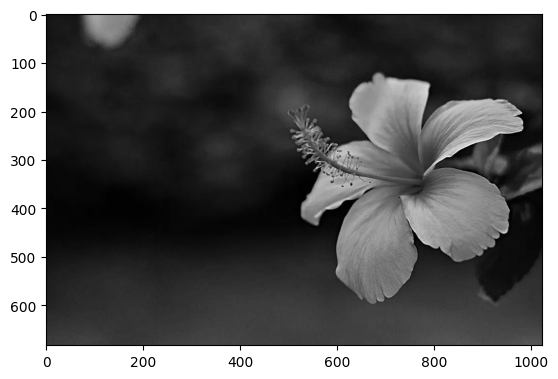

In [4]:
plot.imshow(img.matrix, cmap='gray')
plot.show()

## 1. Intensity Transformation Functions
- Negative
- Nth power
- Nth root
- Log
- Inverse log

In [5]:
gl = img.gray_level
T_neg = []
for i in range(gl+1):
  T_neg.insert(i,gl - i)


T_power = []
for i in range(gl+1):
  T_power.insert(i, int(pow(i, 2)/ pow(gl, 2) * gl))

T_root = []
for i in range(gl+1):
  T_root.insert(i, int(pow(i, .2)/ pow(gl, .2) * gl))


T_log = []
for i in range(gl+1):
    T_log.insert(i, int(math.log(i + 1, 10)/ math.log(gl + 1, 10) * gl))

T_exp = []
for i in range(gl+1):
    T_exp.insert(i, int(pow(2,i)/ pow(2, gl) * gl))

In [6]:
img_neg = np.zeros((img.height, img.width))
img_pow = np.zeros((img.height, img.width))
img_root = np.zeros((img.height, img.width))
img_log = np.zeros((img.height, img.width))
img_exp = np.zeros((img.height, img.width))

for i in range(img.height): 
  for j in range(img.width):
    img_neg[i][j] = T_neg[img.matrix[i][j]]
    img_pow[i][j] = T_power[img.matrix[i][j]]
    img_root[i][j] = T_root[img.matrix[i][j]]
    img_log[i][j] = T_log[img.matrix[i][j]]
    img_exp[i][j] = T_exp[img.matrix[i][j]]

Text(0.5, 1.0, 'Inverse log')

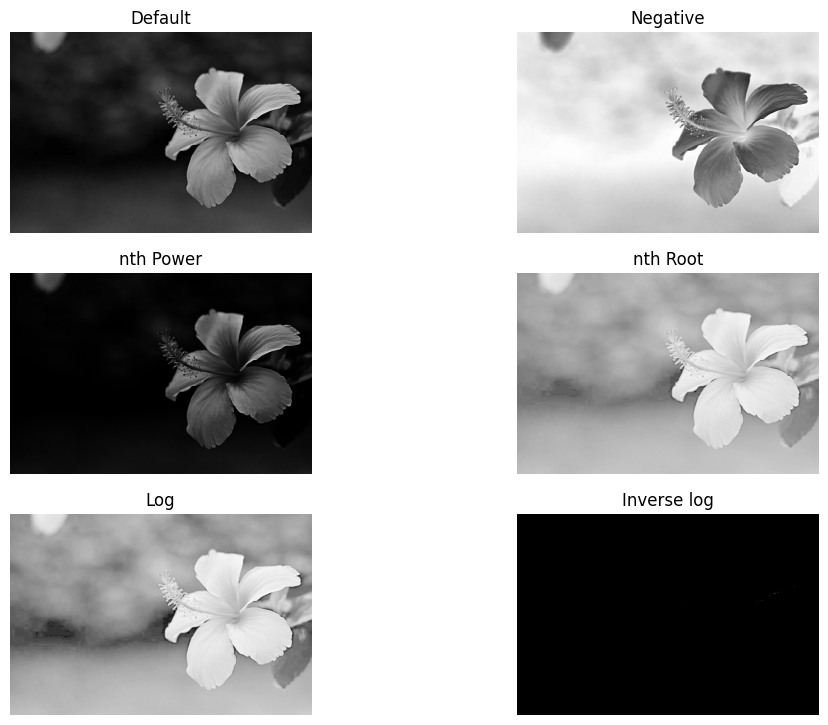

In [7]:
fig = plot.figure(figsize=(12, 12)) 
rows = 4
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Negative
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_neg, cmap='gray')
plot.axis('off') 
plot.title("Negative") 


#Power
fig.add_subplot(rows, columns, 3) 
plot.imshow(img_pow, cmap='gray')
plot.axis('off')
plot.title("nth Power") 


#Root
fig.add_subplot(rows, columns, 4)
plot.imshow(img_root, cmap='gray')
plot.axis('off') 
plot.title("nth Root") 


#Log
fig.add_subplot(rows, columns, 5)
plot.imshow(img_log, cmap='gray')
plot.axis('off') 
plot.title("Log") 

#Inverse log
fig.add_subplot(rows, columns, 6)
plot.imshow(img_exp, cmap='gray')
plot.axis('off') 
plot.title("Inverse log") 

## 2. Contrast stretching function

Contrast stretching expands the range of intensity levels in an image so that it
spans the ideal full intensity range of the recording medium or display device.

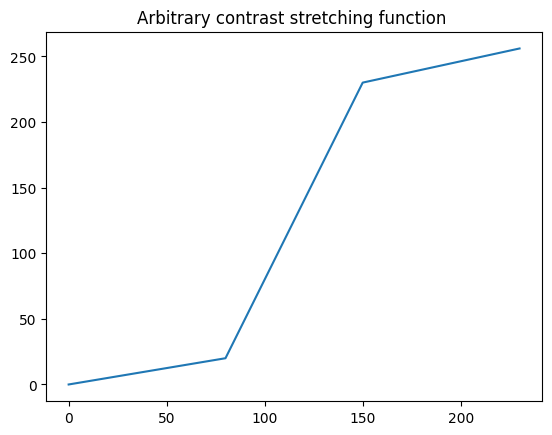

In [8]:
xpoints = np.array([0, 80, 150, 230])
ypoints = np.array([0, 20, 230, 256])
plot.plot(xpoints, ypoints)
plot.title("Arbitrary contrast stretching function ") 
plot.show()

In [9]:
T_cs = []
for i in range(gl + 1):
  if i < 80:
    T_cs.insert(i, int(i/4))
  elif i >= 80 and i < 150:
    T_cs.insert(i, int(3*i - 220))
  else:
    T_cs.insert(i, int((13*i + 7250)/40))

In [10]:
img_cs = np.zeros((img.height, img.width))
for i in range(img.height): 
  for j in range(img.width):
    img_cs[i][j] = T_cs[img.matrix[i][j]]

Text(0.5, 1.0, 'Result of contrast stretching')

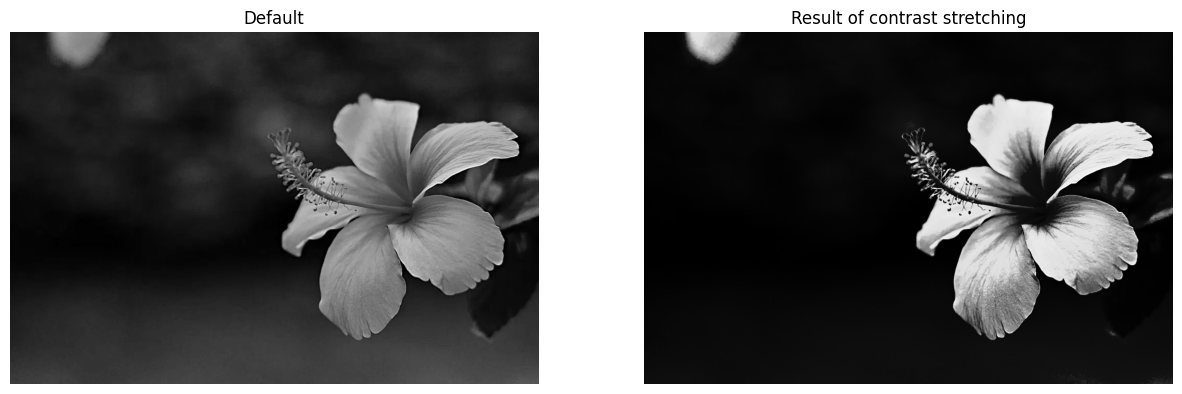

In [11]:
fig = plot.figure(figsize=(15, 15)) 
rows = 1
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Contrast stretching
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_cs, cmap='gray')
plot.axis('off') 
plot.title("Result of contrast stretching") 


### 2.1 Thresholding 

Creates a binary image

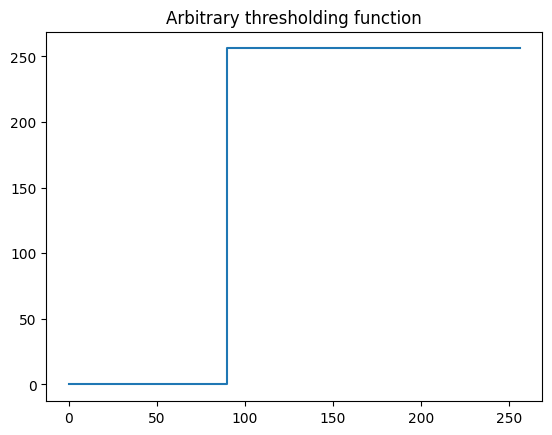

In [12]:
xpoints = np.array([0, 90, 90, 256])
ypoints = np.array([0, 0, 256, 256])
plot.plot(xpoints, ypoints)
plot.title("Arbitrary thresholding function") 
plot.show()

In [13]:
T_th = []
for i in range(gl + 1):
  value = 0 if i <= 90 else 256
  T_th.insert(i, value)

In [14]:
img_th = np.zeros((img.height, img.width))
for i in range(img.height): 
  for j in range(img.width):
    img_th[i][j] = T_th[img.matrix[i][j]]

Text(0.5, 1.0, 'Result of thresholding')

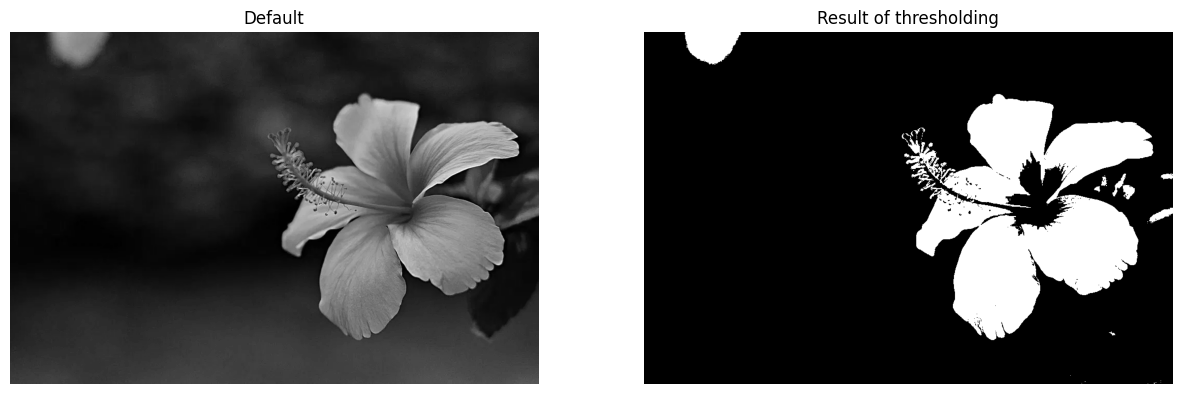

In [15]:
fig = plot.figure(figsize=(15, 15)) 
rows = 1
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Thresholding
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_th, cmap='gray')
plot.axis('off') 
plot.title("Result of thresholding") 


## 3. Intensity-Level Slicing

There are applications in which it is of interest to highlight a specific range of intensities in an image

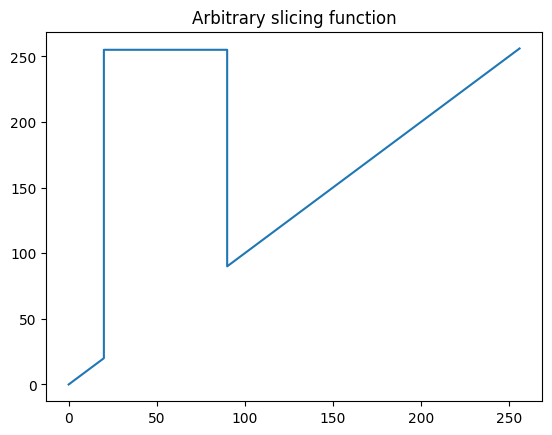

In [16]:
xpoints = np.array([0, 20, 20, 90, 90,256])
ypoints = np.array([0, 20, 255, 255, 90,256])
plot.plot(xpoints, ypoints)
plot.title("Arbitrary slicing function") 
plot.show()

In [17]:
T_sf = []
for i in range(gl + 1):
  if i >= 0 and i <= 90:
    T_sf.insert(i, 255)
  else:
    T_sf.insert(i, i)

In [18]:
img_sf = np.zeros((img.height, img.width))
for i in range(img.height): 
  for j in range(img.width):
    img_sf[i][j] = T_sf[img.matrix[i][j]]

Text(0.5, 1.0, 'Result of Intensity-Level Slicing')

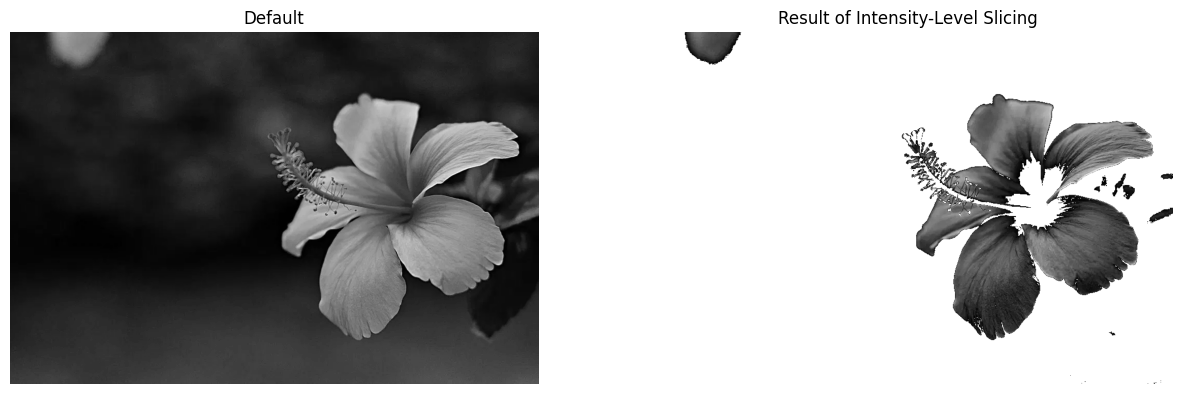

In [19]:
fig = plot.figure(figsize=(15, 15)) 
rows = 1
columns = 2

#Default
fig.add_subplot(rows, columns, 1) 
plot.imshow(img.matrix, cmap='gray')
plot.axis('off') 
plot.title("Default") 

#Intensity-Level Slicing
fig.add_subplot(rows, columns, 2) 
plot.imshow(img_sf, cmap='gray')
plot.axis('off') 
plot.title("Result of Intensity-Level Slicing") 